# Titanic Challenge

Resolveremos el ejercicio que se puede encontrar en:

https://www.kaggle.com/c/titanic-gettingStarted

A continuacion agregare la descripcion de las variables. Esta informacion se puede encontrar en la pagina previamente mencionada. Por conveniencia se traduciran todas las etiquetas y variables a idioma espanol.

DESCRIPCION DE LAS VARIABLES:
    
    Sobrevivio      Sobrevivio (0 = No; 1 = Si) 
    Clase           Clase del Pasajero
                    (1 = 1ra; 2 = 2da; 3 = 3ra)
    Nombre          Nombre
    Sexo            Sexo
    Edad            Edad
    Sibsp           Numero de Hijos/Esposos Abordo
    Parch           Numero de Padres/Ninos Abordo
    Boleto          Numero del Boleto
    Tarifa          Tarifa del Pasajero
    Cabina          Cabina
    Embarco         Puerto Donde Emabarco
                    (C = Cherbourg; Q = Queenstown; S = Southampton)

NOTAS ESPECIALES:

    Clase es un aproximado de su estado socio economico (SES)
     1st ~ Alta; 2nd ~ Media; 3rd ~ Baja

    La Edad esta en anios; Es fraccional si la edad es menor a uno (1)
     Si la edad es estimada, estara en la forma xx.5

In [2]:
#Importamos todas las librerias que necesitamos para analisis y visualizacion
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline

In [53]:
#Cargamos los datos a un DataFrame
titanic_df = pd.read_csv('train_titanic.csv')

In [54]:
#Cambiamos el nombre de las columnas del DataFrame
titanic_df.columns = ['ID_Pasajero', 'Sobrevivio', 'Clase', 'Nombre', 'Sexo', 'Edad', 'SibSp', 'Parch', 'Boleto', 'Tarifa', 'Cabina', 'Embarco']

In [55]:
#Demos una vista a nuestros datos
titanic_df.head(5)

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
#Obtendremos informacion general de nuestros datos
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
ID_Pasajero    891 non-null int64
Sobrevivio     891 non-null int64
Clase          891 non-null int64
Nombre         891 non-null object
Sexo           891 non-null object
Edad           714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Boleto         891 non-null object
Tarifa         891 non-null float64
Cabina         204 non-null object
Embarco        889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Podemos observar que en la columna Age y Cabin existen valores nulos. Procederemos a limpiar nuestra informacion.

In [57]:
#Sustituimos los valores nulos de la edad con la mediana
index = titanic_df['Edad'].isnull()
edadMedia = titanic_df['Edad'].median()
titanic_df.loc[index, 'Edad'] = edadMedia

#Sustituimos los valores nulos de Embarco imputando C
index = titanic_df['Embarco'].isnull()
titanic_df.loc[index, 'Embarco'] = 'C'

#Redondeamos la edad para transformarlo en tipo de dato int (entero)
titanic_df['Edad'] = titanic_df['Edad'].round().astype('int')

In [58]:
#Traducimos los valores del campo Sexo
titanic_df.loc[titanic_df['Sexo'] == 'male', 'Sexo'] = 'Hombre'
titanic_df.loc[titanic_df['Sexo'] == 'female', 'Sexo'] = 'Mujer'

In [59]:
#Volvemos a revisar nuestros datos
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
ID_Pasajero    891 non-null int64
Sobrevivio     891 non-null int64
Clase          891 non-null int64
Nombre         891 non-null object
Sexo           891 non-null object
Edad           891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Boleto         891 non-null object
Tarifa         891 non-null float64
Cabina         204 non-null object
Embarco        891 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


In [25]:
#Checamos la transformacion de nuestros datos
titanic_df.head(10)

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",Hombre,28,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",Hombre,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",Hombre,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mujer,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Mujer,14,1,0,237736,30.0708,NaN,C


## Para entender mejor el problema, resolvamos las siguientes preguntas:
    1.) Quienes eran los pasajeros del Titanic? (Edad,Genero,Clase,..etc)
    2.) En que cubierta estaban los pasajeros?
    3.) De donde vienen los pasajeros?
    4.) Quien estaba solo y quienes tenian familia?
    5.) Que factores ayudaron a sobrevivir del hundimiento?

### 1.) Quienes eran los pasajeros del Titanic? (Edad,Genero,Clase,..etc)

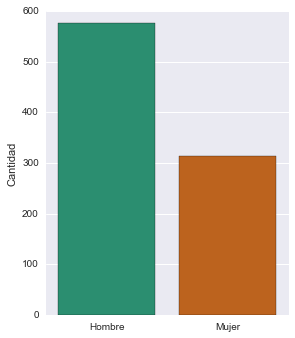

In [27]:
#Chequemos el genero
g = sns.factorplot('Sexo',data=titanic_df, kind='count', palette='Dark2', size=5, aspect=.8)
(g.set_axis_labels("", "Cantidad"))

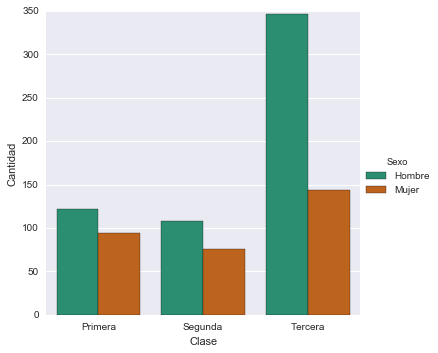

In [29]:
#Separemos el genero por clases
g = sns.factorplot('Clase', data=titanic_df,hue='Sexo',kind='count', palette='Dark2', size=5)
(g.set_axis_labels("Clase", "Cantidad")
.set_xticklabels(["Primera","Segunda","Tercera"]))

Un descubrimiento interesante que podemos observar es que hay muchos mas hombres en 3ra clase que mujeres, en relacion a las demas clases. Sin embargo seria util separarlos entre mujeres, hombres y niños.

In [60]:
#Creamos una funcion para determinar si son niños o no (Asumiremos que menores de 16 años son niños)
def tipo_pasajero(pasajero):
    edad,sexo = pasajero
    if edad < 16:
        return 'Nino'
    else:
        return sexo

In [61]:
#Aplicamos nuestra funcion a una nueva columna
titanic_df['TipoPersona'] = titanic_df[['Edad','Sexo']].apply(tipo_pasajero,axis=1)

In [32]:
#Demos una vista a nustros datos
titanic_df.head(10)

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco,TipoPersona
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,NaN,S,Hombre
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,C85,C,Mujer
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Mujer
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,C123,S,Mujer
4,5,0,3,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,NaN,S,Hombre
5,6,0,3,"Moran, Mr. James",Hombre,28,0,0,330877,8.4583,NaN,Q,Hombre
6,7,0,1,"McCarthy, Mr. Timothy J",Hombre,54,0,0,17463,51.8625,E46,S,Hombre
7,8,0,3,"Palsson, Master. Gosta Leonard",Hombre,2,3,1,349909,21.0750,NaN,S,Nino
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mujer,27,0,2,347742,11.1333,NaN,S,Mujer
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Mujer,14,1,0,237736,30.0708,NaN,C,Nino


Perfecto! Hemos separado a los pasajeros entre niños, mujeres y hombres.

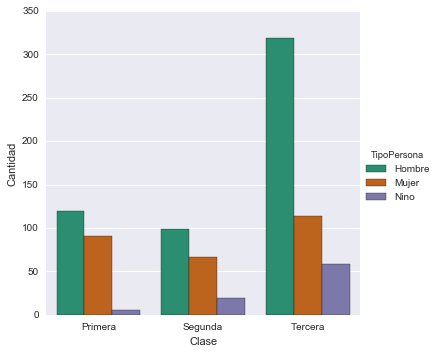

In [34]:
#Ahora grafiquemos agrupandolo por tipo de persona
g = sns.factorplot('Clase', data=titanic_df, hue='TipoPersona', kind='count', palette='Dark2', size=5)
(g.set_axis_labels("Clase", "Cantidad")
.set_xticklabels(["Primera","Segunda","Tercera"]))

Se puede observar que hay bantantes niños en 3ra clase y muy pocos en 1ra. 

A continuacion crearemos distribuciones de edades para conocer mas informacion acerca de los pasajeros.

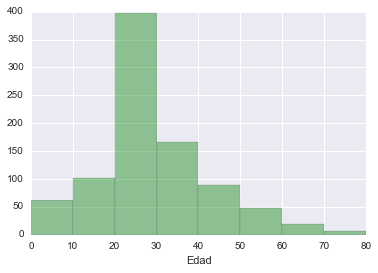

In [35]:
sns.distplot(titanic_df['Edad'], kde=False, color='g', bins=8)

In [36]:
#Obtenemos una comparasion general entre niños, mujeres y hombres
titanic_df['TipoPersona'].value_counts()

Hombre    537
Mujer     271
Nino       83
Name: TipoPersona, dtype: int64

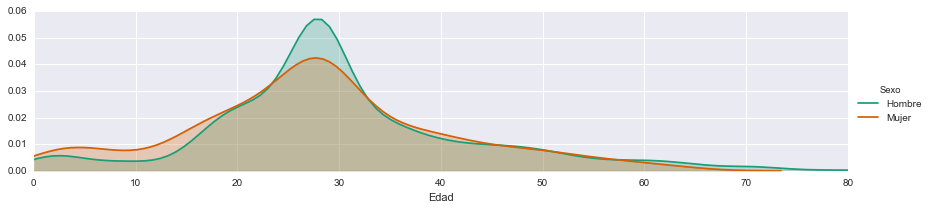

In [37]:
#Otra manera de visualizar los datos es graficando los KDE (Calculando la Funcion de Densidad de Probablidad) 
#en una misma grafica
fig = sns.FacetGrid(titanic_df, hue='Sexo', aspect=4, palette='Dark2')
fig.map(sns.kdeplot,'Edad', shade=True)
oldest = titanic_df['Edad'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

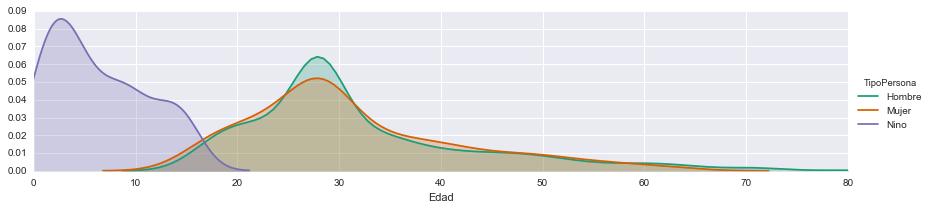

In [38]:
#Ahora usamos Tipo de Persona
fig = sns.FacetGrid(titanic_df, hue='TipoPersona', aspect=4, palette='Dark2')
fig.map(sns.kdeplot,'Edad', shade=True)
oldest = titanic_df['Edad'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

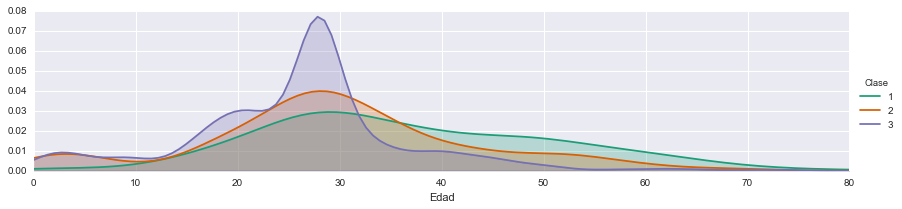

In [39]:
#Ahora por clase
fig = sns.FacetGrid(titanic_df, hue='Clase', aspect=4, palette='Dark2')
fig.map(sns.kdeplot,'Edad', shade=True)
oldest = titanic_df['Edad'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Obtuvimos bastante informacion acerca de como eran los pasajeros basados en su genero, edad y clase.

### 2.) En que cubierta estaban los pasajeros?

In [40]:
#Volvemos a observar nuestros datos
titanic_df.head()

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco,TipoPersona
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,NaN,S,Hombre
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,C85,C,Mujer
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Mujer
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,C123,S,Mujer
4,5,0,3,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,NaN,S,Hombre


Solo necesitamos la primera letra de la cubierta para clasificar su nivel (ej. A,B,C,D,E,F,G)

In [62]:
#Creamos una nueva columna con el formato deseado
titanic_df['Cubierta'] = titanic_df['Cabina'][titanic_df['Cabina'].notnull()].astype(str).map(lambda x: x[0])

In [63]:
titanic_df.head()

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco,TipoPersona,Cubierta
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,NaN,S,Hombre,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,C85,C,Mujer,C
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Mujer,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,C123,S,Mujer,C
4,5,0,3,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,NaN,S,Hombre,NaN


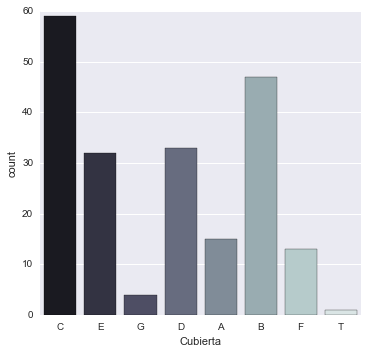

In [43]:
sns.factorplot('Cubierta', data=titanic_df, palette='bone', kind='count', size=5)

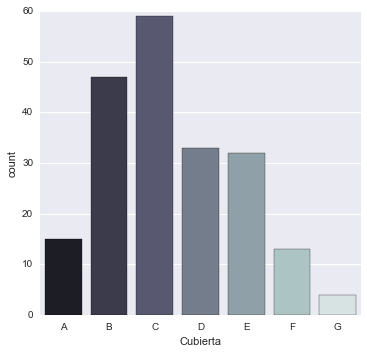

In [45]:
#Eliminamos los datos de la cubierta "T" que no hacen sentido a nuestro conjunto de datos
titanic_df.loc[titanic_df['Cubierta'] == 'T', 'Cubierta'] = np.NaN
sns.factorplot('Cubierta', data=titanic_df, palette='bone', kind='count', order=['A','B','C','D','E','F','G'], size=5)

Muy bien, ahora conocemos la distribucion de los pasajeros. Hay que recordar que solo tenemos 204 valores de los 890 pasajeros.

### 3.) De donde vienen los pasajeros?

In [46]:
titanic_df.head()

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco,TipoPersona,Cubierta
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,NaN,S,Hombre,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,C85,C,Mujer,C
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Mujer,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,C123,S,Mujer,C
4,5,0,3,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,NaN,S,Hombre,NaN


Nota: La columna Embarcado tiene tres valores C,Q y S. Estos hacen referencia a Cherbourg, Queenstown, Southhampton.

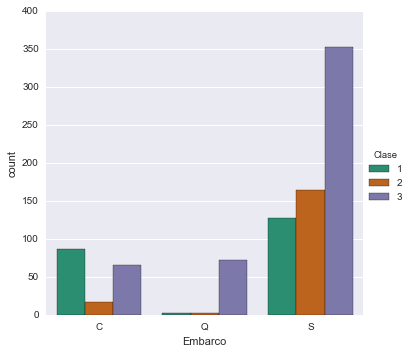

In [47]:
sns.factorplot('Embarco', data=titanic_df, hue='Clase',order=['C','Q','S'], kind='count', palette='Dark2', size=5)

Un hallazgo interesante es que en Queenstown, casi todo los pasajeros que abordaron son de tercera clase. Podria ser interesante investigar la razon de este suceso, quiza la economia de ese lugar en ese periodo de tiempo.

Tambien podemos visualizar los datos de la siguiente forma para conocer la distribucion de sus edades respecto a su clase y Embarque

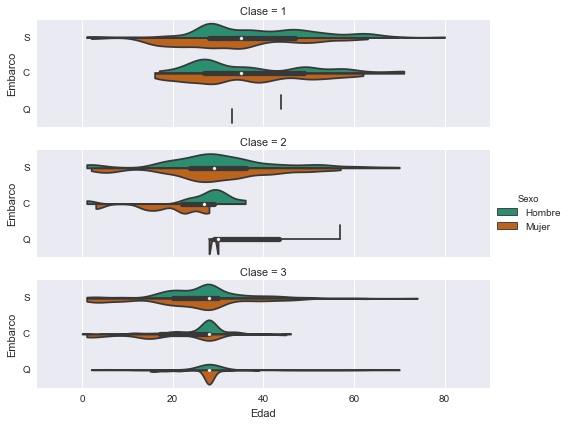

In [49]:
sns.factorplot(x='Edad', y='Embarco', hue='Sexo', row='Clase',data=titanic_df[titanic_df.Embarco.notnull()],
                orient="h", size=2, aspect=3.5, palette="Dark2",kind="violin", split=True, cut=0, bw=.2)

### 4.) Quien estaba solo y quienes tenian familia?

Para determinar si una persona esta sola o no, sumaremos los campos de los familiares.

In [64]:
#Agregamos una nueva columna para definir quienes estan solos
titanic_df['Solo'] = titanic_df.Parch + titanic_df.SibSp

In [65]:
#Asignamos valores
titanic_df.loc[titanic_df['Solo'] > 0, 'Solo'] = 'Con Familia'
titanic_df.loc[titanic_df['Solo'] == 0, 'Solo'] = 'Solo'

In [66]:
titanic_df.head()

,ID_Pasajero,Sobrevivio,Clase,Nombre,Sexo,Edad,SibSp,Parch,Boleto,Tarifa,Cabina,Embarco,TipoPersona,Cubierta,Solo
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,NaN,S,Hombre,NaN,Con Familia
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,C85,C,Mujer,C,Con Familia
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Mujer,NaN,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,C123,S,Mujer,C,Con Familia
4,5,0,3,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,NaN,S,Hombre,NaN,Solo


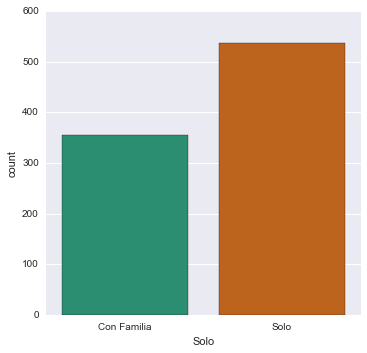

In [67]:
#Ahora grafiquemos nuestros datos
sns.factorplot('Solo',data=titanic_df, kind='count', palette='Dark2',size=5)

Podemos observar que la mayoria de los pasajeros estaban solos

### 5.) Que factores ayudaron a sobrevivir del hundimiento?

Primero hay que determinar cuantos pasajeros fallecieron

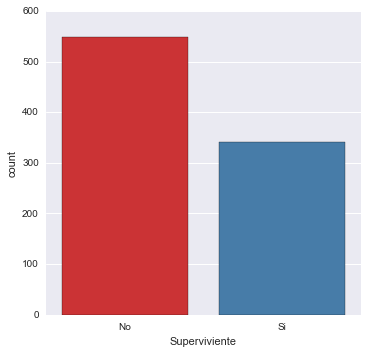

In [69]:
#Creamos una nueva columna con el proposito de que sea legible
titanic_df['Superviviente'] = titanic_df.Sobrevivio.map({0: 'No', 1: 'Si'})

#Graficamos el numero de personas que sobrevivieron
sns.factorplot('Superviviente',data=titanic_df, palette='Set1', kind='count', size=5)

Podemos observar que hubo mas fallecidos que supervivientes.

Veamos si la clase de los pasajeros tiene un efecto en su tasa de supervivencia.

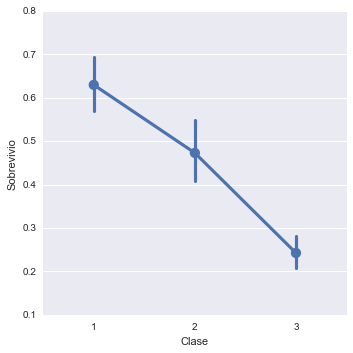

In [74]:
#Graficamos considerando la clase
sns.factorplot('Clase', 'Sobrevivio', data=titanic_df, size=5)

La tasa de supervivencia de la 3ra clase es substancialmente baja. Pero posiblemente este efecto es causado por el gran numero de hombres en la 3ra clase. Agregaremos a nuestra grafica la clasificacion de las personas para determinar si eran niños, mujeres u hombres.

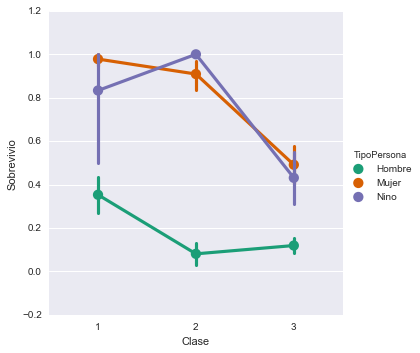

In [75]:
#Graficamos considerando la clase y tipo de persona
sns.factorplot('Clase', 'Sobrevivio',hue='TipoPersona', data=titanic_df, palette='Dark2', size=5)

De estos datos podemos observar que ser hombre o pertenecer a la 3ra clase no son favorables para la sobrevivencia. Incluso sin tener en cuenta la clase, el hecho de ser hombre disminuye dramaticamente las probabilidades de sobrevivir.

Que hay de la edad? Ser mas joven o viejo tiene un efecto en la tasa de supervivencia?

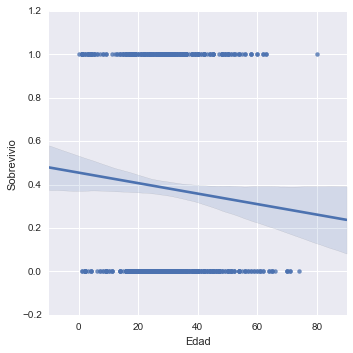

In [73]:
#Usemos una grafica lineal para representar la edad contra la sobrevivencia
sns.lmplot('Edad', 'Sobrevivio', data=titanic_df, palette='Set1', size=5)

La tendencia general es que entre mas viejo fuera el pasajero, es menos probable que sobreviviera.

Agregaremos mas parametros para determinar si la clase tiene un efecto en la tasa de sobrevivencia.

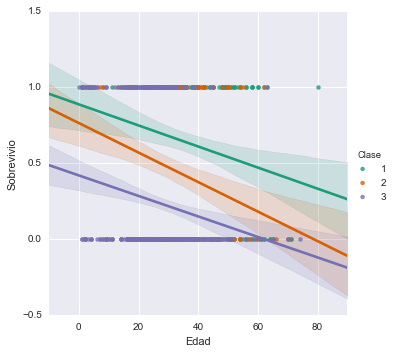

In [76]:
#Separamos la grafica por clases
sns.lmplot('Edad', 'Sobrevivio', data=titanic_df, hue='Clase', palette='Dark2', size=5)

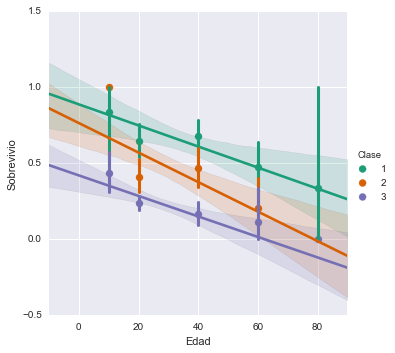

In [77]:
#Usaremos rangos para obtener una visualizacion mas limpia
generations=[10,20,40,60,80]
sns.lmplot('Edad','Sobrevivio',hue='Clase',data=titanic_df,palette='Dark2',x_bins=generations, size=5)

Algo interesante a destacar es que las personas mas viejas de 1ra clase tengan una desviacion estandar tan alta.

A continuacion relacionaremos el genero y la edad.

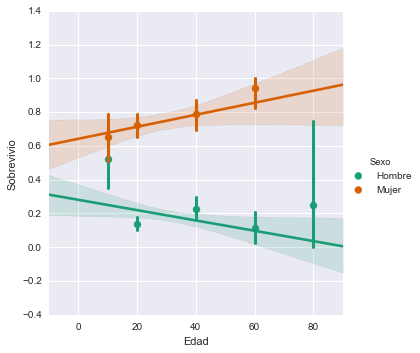

In [78]:
#Ahora separamos la grafica por sexos
sns.lmplot('Edad', 'Sobrevivio', hue='Sexo', data=titanic_df, palette='Dark2', x_bins=generations, size=5)

La tendencia nos muestra que ser mujer de mayor edad aumentaba las probabilidades de sobrevivir, por el contrario ser hombre dismuniye las probabilidades de sobrevivir, sin embargo como vimos en un caso anterior, las personas de mayor edad tienen una desviacion estandar alta.

Podriamos preguntarnos si las cubiertas tienen algun efecto en la tasa de supervivencia?

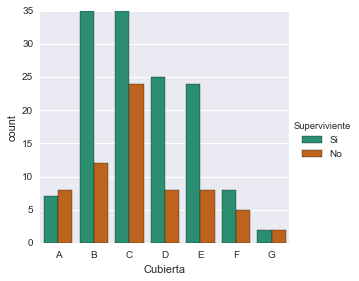

In [79]:
#Graficamos el numero de supervivientes por Cubierta
sns.factorplot('Cubierta',data=titanic_df,hue='Superviviente',kind='count',
               order=['A','B','C','D','E','F','G'],palette='Dark2', hue_order=['Si','No'])

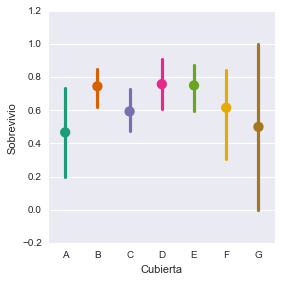

In [81]:
sns.factorplot('Cubierta', 'Sobrevivio',data=titanic_df,
               order=['A','B','C','D','E','F','G'],palette='Dark2')

Podriamos pensar que las cubiertas B, D y E tienen la tasa mas alta de supervivencia, pero recordemos que no tenemos todos los datos de los pasajeros. Como mencionamos anteriormente solo tenemos 204 valores de los 890.

Revisemos un poco mas a detalle esos datos, por ejemplo a que clase pertenecen?

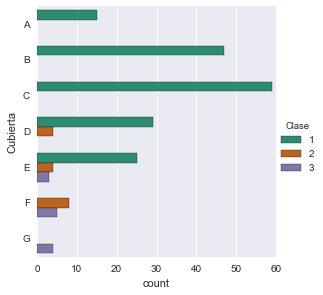

In [82]:
sns.factorplot(y='Cubierta',data=titanic_df,hue='Clase',kind='count',
               order=['A','B','C','D','E','F','G'],palette='Dark2')

A simple vista se puede ver que hay mucho mas datos de 1ra clase que de las demas, investiguemos un poco mas.

In [83]:
#Agrupemos nuestros datos para determinar la cantidad de datos de cabina que tenemos por clase
datos_df = titanic_df.groupby('Clase')['Cubierta'].value_counts(normalize=True).reset_index().groupby('Clase')  \
.sum().reset_index(level=0)
datos_df.columns = ['Clase', 'Datos']
datos_df['Total'] = 1

ValueError: cannot insert Cubierta, already exists

In [ ]:
#Ahora graficamos
f, ax = plt.subplots()
sns.barplot('Total', 'Pclass',  data=datos_df, color='grey', orient='h', label='Total')
sns.barplot('Data', 'Pclass',  data=datos_df, palette='Set2', orient='h', label='Datos')
ax.set(xlim=(0, 1), ylabel="Clase", xlabel="Datos Obtenidos")

Claramente podemos observar que tenemos un poco mas del 80% de los datos de 1ra clase, mientras que para las demas clases los datos obtenidos no alcanza el 20%, por lo tanto no es posible hacer una conclusion sobre el efecto que tuvieron las cubiertas.

Por ultimo revisemos si estar solo tenia un efecto en la tasa de superviencia.

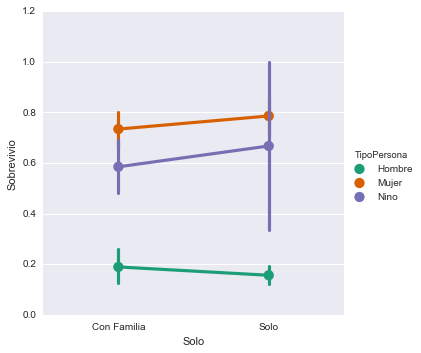

In [84]:
#Agrupemos por sexo
sns.factorplot('Solo', 'Sobrevivio', hue='TipoPersona', data=titanic_df, palette='Dark2', size=5)

Observamos que los hombres tenian un ligera mejor posibilidad de sobrevivir si tenian familia, por el contrario las mujeres muestran una tendencia opuesta. El sexo sigue siendo un factor determinante para decidir si sobrevive o no el pasajero.

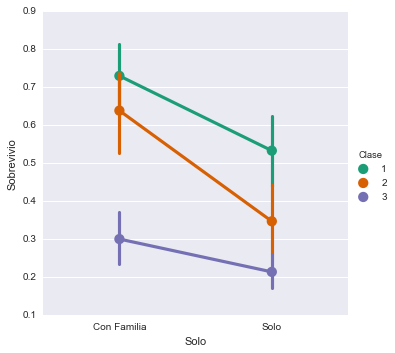

In [85]:
#Agrupemos por clase
sns.factorplot('Solo', 'Sobrevivio', hue='Clase', data=titanic_df, palette='Dark2', size=5)

Podemos observar que la clase sigue influyendo significativamente en la tasa de supervivencia y tambien que estar solo disminuye ligeramente las probabilidades de sobrevivir.

En conclusion podemos decir que los factores que mas influyeron significativamente en la supervivencia de los pasajeros, fueron el sexo, la clase y edad, mientras que la cantidad de familiares o donde embarcaron afectan en menor medida.

### Machine Learning

Usemos el algoritmo random forest para hacer predicciones, determinar su precision y caracteriticas mas relevantes

In [ ]:
#Observamos nuestros datos
titanic_df.head()

In [ ]:
#Seleecionamos las caracteristicas que usaremos en nuestro modelo
features = ['Survived','Pclass','TypeP','Age','Embarked','Alone']
train = titanic_df[features]
train.head(10)

In [ ]:
#Checamos que no existan nulos
train.info()

In [ ]:
#Retiramos los valores nulos
train.dropna(inplace=True)

In [ ]:
#Agregamos imports necesarios
import sklearn.ensemble as ske
from patsy import dmatrices

#Creamos una formula para la matriz de diseño de nuestro modelo
#l = [3,2,1]
formula = 'Survived ~ C(Pclass) + C(TypeP) + Age + C(Embarked) + C(Alone)'

In [ ]:
#Creamos las matrices de diseño
y, x = dmatrices(formula, data=train, return_type='dataframe')
y = np.asarray(y).ravel()

#Creamos nuestro random forest
results_rf2 = ske.RandomForestClassifier(n_estimators=100).fit(x,y)

#Obtenemos la puntuacion de presicion y caracteristicas
score = results_rf2.score(x,y)
importances = results_rf2.feature_importances_

In [ ]:
x.head()

In [ ]:
#agrupamos para darle un mejor estilo a la grafica
groupImportances = [importances[1:3].sum(), importances[3:5].sum(), importances[5:7].sum(), importances[7], importances[8]]
d = {'Feature': Series(['Pclass','TypeP', 'Embarked', 'Alone', 'Age']),
    'Values': Series(groupImportances)}
importances_df = DataFrame(d).sort_values(by='Values', ascending=False)

In [ ]:
#Graficamos las caracteristicas mas importantes
sns.barplot('Feature', 'Values',  data=importances_df, palette='Dark2')

In [ ]:
print ("La presicion de las predicciones del Random Forest es: {0}".format(score))

Podemos observar que el comportamiento de nuestro random forest es muy acertado